In [21]:
from evaluation_metrics import tpr, fpr
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Receiver Operating Characteristic (ROC)

In [9]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for threshold in thresholds:
    # calculate predicttions for a given threshold
    temp_pred = [1 if x >= threshold else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

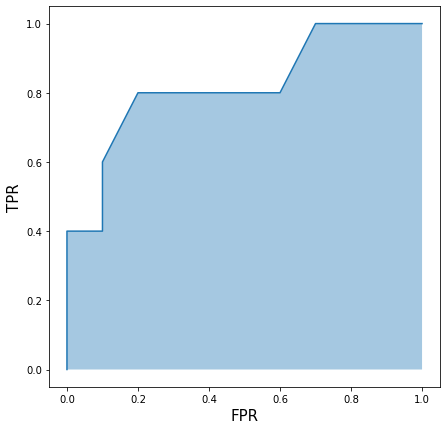

In [17]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [20]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

## Confusion Matrix

Text(0.5, 16.5, 'Predicted')

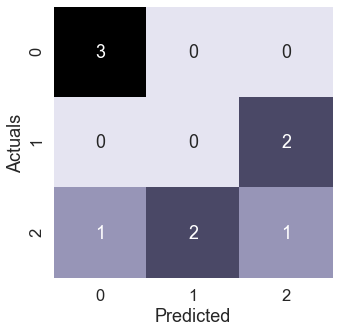

In [34]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get a confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot usig matplotlib and seaborn
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actuals')
plt.xlabel('Predicted')